In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('virat kohli data.csv')

In [4]:
### Getting basic information about the data

In [5]:
df.head(10)

,index,runs,opponent,ground,date,match,Match_No,total
0,0,12,SriLanka,Dambulla,18Aug2008,ODI,1,12
1,1,37,SriLanka,Dambulla,20Aug2008,ODI,2,49
2,2,25,SriLanka,Colombo(RPS),24Aug2008,ODI,3,74
3,3,54,SriLanka,Colombo(RPS),27Aug2008,ODI,4,128
4,4,31,SriLanka,Colombo(RPS),29Aug2008,ODI,5,159
5,5,2,SriLanka,Colombo(RPS),14Sep2009,ODI,6,161
6,6,16,Pakistan,Centurion,26Sep2009,ODI,7,177
7,8,79,WestIndies,Johannesburg,30Sep2009,ODI,8,256
8,9,30,Australia,Vadodara,25Oct2009,ODI,9,286
9,10,10,Australia,Mohali,2Nov2009,ODI,10,296


In [6]:
df.shape

(516, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     516 non-null    int64 
 1   runs      516 non-null    int64 
 2   opponent  516 non-null    object
 3   ground    516 non-null    object
 4   date      516 non-null    object
 5   match     516 non-null    object
 6   Match_No  516 non-null    int64 
 7   total     516 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 32.4+ KB


In [8]:
df.describe()

,index,runs,Match_No,total
count,516.000000,516.000000,516.000000,516.000000
mean,270.118217,45.947674,258.500000,11681.726744
std,155.219618,44.584372,149.100637,7301.114849
min,0.000000,0.000000,1.000000,12.000000
25%,134.750000,11.000000,129.750000,5328.250000
50%,270.500000,32.500000,258.500000,10886.500000
75%,403.250000,70.250000,387.250000,18535.750000
max,539.000000,254.000000,516.000000,23709.000000


In [9]:
df['opponent'].unique()

array(['SriLanka', 'Pakistan', 'WestIndies', 'Australia', 'Bangladesh',
       'SouthAfrica', 'Zimbabwe', 'NewZealand', 'England', 'Ireland',
       'Netherlands', 'Afghanistan', 'U.A.E.', 'Scotland'], dtype=object)

In [10]:
df['ground'].unique()

array(['Dambulla', 'Colombo(RPS)', 'Centurion', 'Johannesburg',
       'Vadodara', 'Mohali', 'Rajkot', 'Nagpur', 'Kolkata', 'Mirpur',
       'Jaipur', 'Ahmedabad', 'Bulawayo', 'Harare', 'Visakhapatnam',
       'Guwahati', 'Bengaluru', 'Chennai', 'Durban', 'CapeTown',
       'Gqeberha', 'Delhi', 'Wankhede', 'PortofSpain', 'NorthSound',
       'Kingston', 'Bridgetown', 'Roseau', 'Manchester',
       'Chester-le-Street', 'Southampton', 'TheOval', "Lord's", 'Cardiff',
       'Hyderabad(Deccan)', 'Cuttack', 'Indore', 'Melbourne', 'Sydney',
       'Perth', 'Adelaide', 'Brisbane', 'Hobart', 'Hambantota',
       'Pallekele', 'Pune', 'Kochi', 'Ranchi', 'Dharamsala', 'Birmingham',
       'Kanpur', 'Napier', 'Hamilton', 'Auckland', 'Wellington',
       'Fatullah', 'Nottingham', 'Leeds', 'Galle', 'Colombo(PSS)',
       'Colombo(SSC)', 'Canberra', 'GrosIslet', 'Lauderhill',
       'Thiruvananthapuram', 'Dublin(Malahide)', 'Bristol', 'Brabourne',
       'MountMaunganui', 'Providence', 'Christchurch'

In [11]:
### Checking for null and duplicate values

In [12]:
# Duplicate
print("Number of duplicate values = ", df.duplicated().sum())

Number of duplicate values =  0


In [13]:
# Null
print('Number of null values = ', df.isna().any(axis = 0).sum())

Number of null values =  0


In [14]:
# Removing 'index' column
df = df.drop('index', axis = 1)

In [15]:
### Adding month and year columns

In [16]:
df1 = df.copy()

In [17]:
# Converting 'date' column to a datetime object
df1['date'] = pd.to_datetime(df1['date'])

In [18]:
# Quarter
df1['Quarter'] = df1['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [19]:
# Month
df1['Month'] = df1['date'].dt.strftime('%B')

In [20]:
#Year
df1['Year'] = df1['date'].dt.strftime('%Y')

In [21]:
df1.head()

,runs,opponent,ground,date,match,Match_No,total,Quarter,Month,Year
0,12,SriLanka,Dambulla,2008-08-18,ODI,1,12,2008-Q3,August,2008
1,37,SriLanka,Dambulla,2008-08-20,ODI,2,49,2008-Q3,August,2008
2,25,SriLanka,Colombo(RPS),2008-08-24,ODI,3,74,2008-Q3,August,2008
3,54,SriLanka,Colombo(RPS),2008-08-27,ODI,4,128,2008-Q3,August,2008
4,31,SriLanka,Colombo(RPS),2008-08-29,ODI,5,159,2008-Q3,August,2008


In [22]:
### Renaming necessary columns

In [23]:
df1.rename(columns = {'total':'total_runs'}, inplace = True)
df1.columns

Index(['runs', 'opponent', 'ground', 'date', 'match', 'Match_No', 'total_runs',
       'Quarter', 'Month', 'Year'],
      dtype='object')

In [24]:
### Visualizations (analysis)

In [25]:
### Runs scored in each format
runs_per_format = df1.drop('date', axis = 1).groupby(['match']).sum()[['runs']]
runs_per_format

,runs
match,
ODI,12327
T20,3308
Test,8074


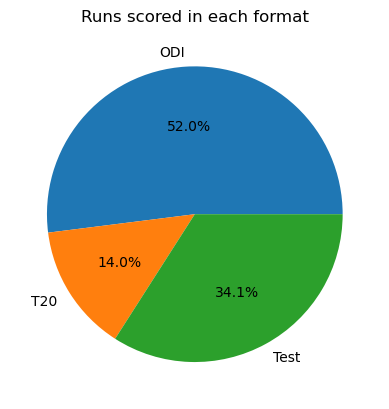

In [26]:
plt.pie(data = runs_per_format, x = 'runs', labels = runs_per_format.index, autopct = '%1.1f%%')
plt.title('Runs scored in each format');

In [27]:
### Runs scored against each team
runs_by_opponent = df1.drop('date', axis = 1).groupby('opponent').sum().sort_values(by = 'runs', ascending = False)[['runs']]
runs_by_opponent

,runs
opponent,
Australia,4483
England,3903
WestIndies,3653
SriLanka,3644
SouthAfrica,2893
NewZealand,2555
Bangladesh,1201
Pakistan,847
Zimbabwe,279


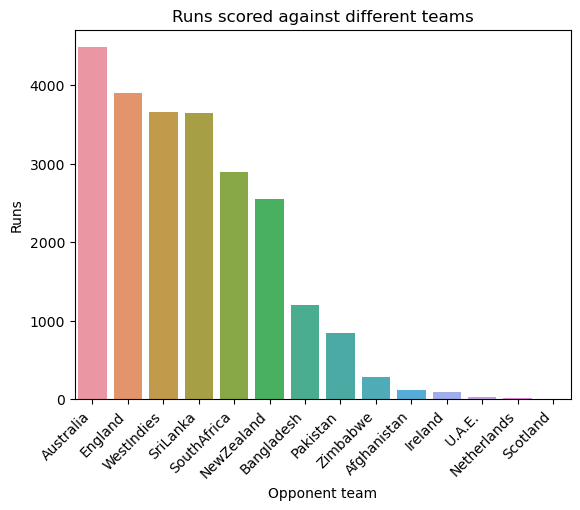

In [28]:
g1 = sns.barplot(x = runs_by_opponent.index, y = 'runs', data = runs_by_opponent)
g1.set_xlabel('Opponent team')
g1.set_ylabel('Runs')
g1.set_title('Runs scored against different teams')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

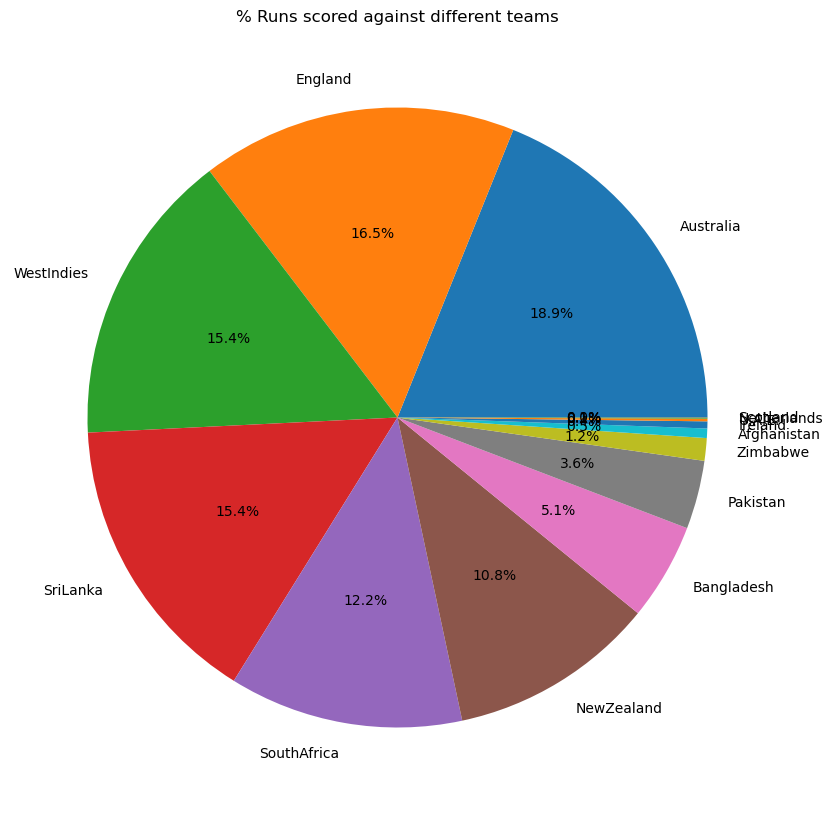

In [29]:
plt.figure(figsize=(10, 15))
plt.pie(data = runs_by_opponent, x = 'runs', labels = runs_by_opponent.index, autopct = '%1.1f%%')
plt.title('% Runs scored against different teams');

In [30]:
### Most half century and full cuntury scored against opponents
fifty = df1[df1['runs'] >= 50] #Dataframe only consisting of rows where Virat scored a half century
hundred = df1[df1['runs'] >= 100] #Dataframe only consisting of rows where Virat scored a full century

fifty_runs_by_opponent = fifty.drop('date', axis = 1).groupby('opponent').count().sort_values(by = 'runs', ascending = False)[['runs']]
hundred_runs_by_opponent = hundred.drop('date', axis = 1).groupby('opponent').count().sort_values(by = 'runs', ascending = False)[['runs']]

print('Most half centuries against:\n', fifty_runs_by_opponent)
print('\n\nMost full centuries against:\n', hundred_runs_by_opponent)

Most half centuries against:
              runs
opponent         
Australia      37
WestIndies     33
England        30
SriLanka       30
NewZealand     21
SouthAfrica    21
Bangladesh      9
Pakistan        7
Afghanistan     2
Zimbabwe        2


Most full centuries against:
              runs
opponent         
Australia      15
SriLanka       13
WestIndies     11
England         8
NewZealand      8
SouthAfrica     7
Bangladesh      5
Pakistan        2
Zimbabwe        1


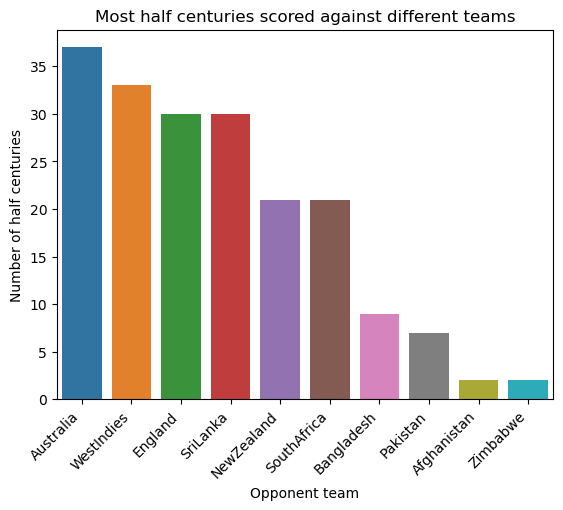

In [31]:
g2 = sns.barplot(x = fifty_runs_by_opponent.index, y = fifty_runs_by_opponent['runs'])
g2.set_xlabel('Opponent team')
g2.set_ylabel('Number of half centuries')
g2.set_title('Most half centuries scored against different teams')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

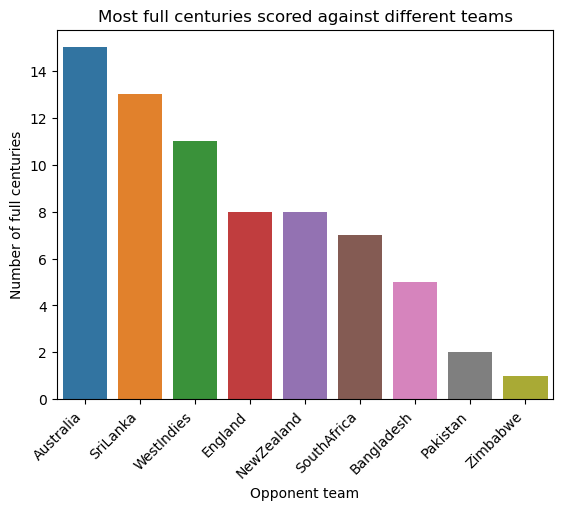

In [32]:
g2 = sns.barplot(x = hundred_runs_by_opponent.index, y = hundred_runs_by_opponent['runs'])
g2.set_xlabel('Opponent team')
g2.set_ylabel('Number of full centuries')
g2.set_title('Most full centuries scored against different teams')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [33]:
### Runs scored in each venue
runs_by_venue = df1.drop('date', axis = 1).groupby(['ground']).sum()[['runs']].sort_values(by = 'runs', ascending = False)
runs_by_venue

,runs
ground,
Mirpur,1258
Wankhede,931
Visakhapatnam,879
Adelaide,843
Kolkata,788
...,...
Bridgetown,27
Christchurch,17
Brabourne,16


In [34]:
### Runs scored in each month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
runs_by_month = df1.drop('date', axis = 1).groupby('Month').sum()[['runs']].reindex(month_order)
runs_by_month

,runs
Month,
January,3454
February,2687
March,2121
April,184
May,82
June,1524
July,1662
August,2259
September,1262


D:\E\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\E\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


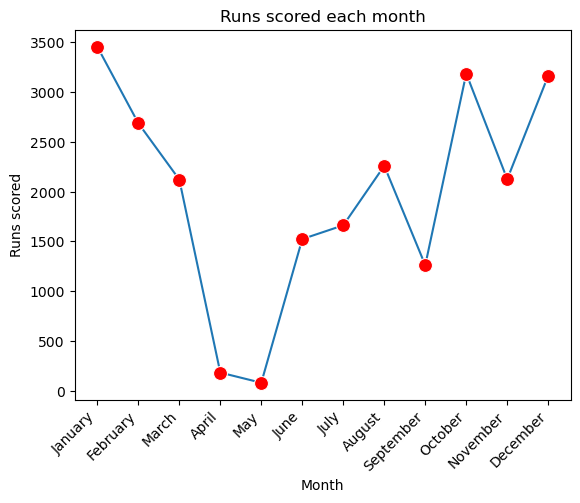

In [35]:
g3 = sns.lineplot(x = runs_by_month.index, y = runs_by_month['runs'], marker = 'o', markerfacecolor = 'red', markersize = 10)
g3.set_xlabel('Month')
g3.set_ylabel('Runs scored')
g3.set_title('Runs scored each month')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [36]:
### Runs scored in each year
runs_by_year = df1.drop('date', axis = 1).groupby('Year').sum()[['runs']]
runs_by_year

,runs
Year,
2008,159
2009,325
2010,1021
2011,1644
2012,2186
2013,1913
2014,2286
2015,1307
2016,2595


D:\E\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\E\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


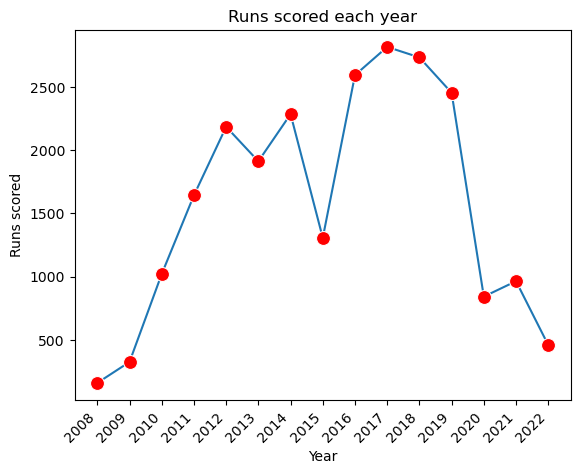

In [37]:
g4 = sns.lineplot(x = runs_by_year.index, y = runs_by_year['runs'], marker = 'o', markerfacecolor = 'red', markersize = 10)
g4.set_xlabel('Year')
g4.set_ylabel('Runs scored')
g4.set_title('Runs scored each year')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [38]:
### Fifties scored in each month and year
fifty_runs_by_month = fifty.drop('date', axis = 1).groupby('Month').count().reindex(month_order)[['runs']]
fifty_runs_by_year = fifty.drop('date', axis = 1).groupby('Year').count()[['runs']]
print('Number of half centuries scored per month\n', fifty_runs_by_month)
print('\n\nNumber of half centuries scored per year\n', fifty_runs_by_year)

Number of half centuries scored per month
            runs
Month          
January      30
February     20
March        18
April         2
May           1
June         13
July         10
August       20
September    12
October      23
November     18
December     25


Number of half centuries scored per year
       runs
Year      
2008     1
2009     3
2010    10
2011    14
2012    18
2013    16
2014    20
2015     7
2016    20
2017    21
2018    20
2019    21
2020     7
2021    10
2022     4


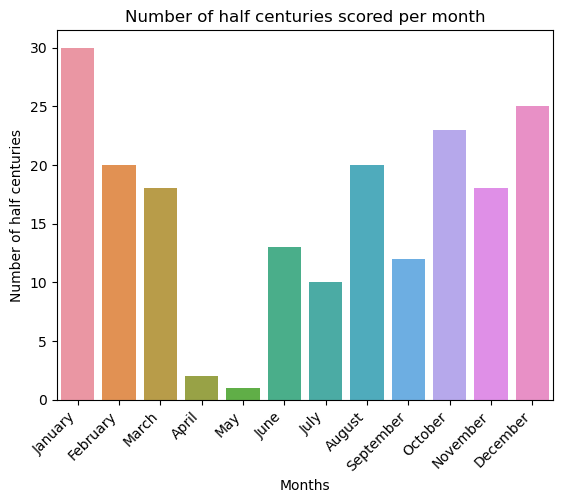

In [39]:
g5 = sns.barplot(x = fifty_runs_by_month.index, y = fifty_runs_by_month['runs'])
g5.set_xlabel('Months')
g5.set_ylabel('Number of half centuries')
g5.set_title('Number of half centuries scored per month')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

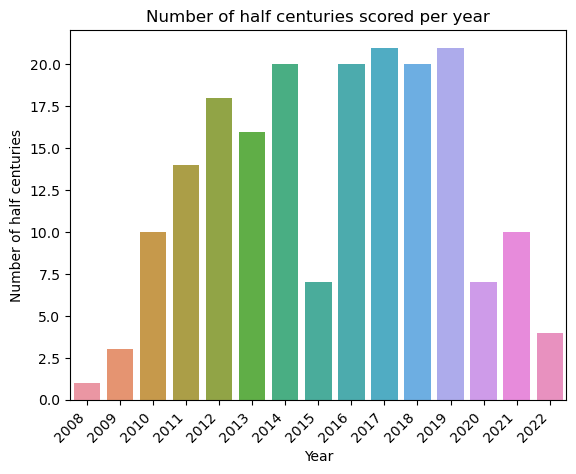

In [40]:
g6 = sns.barplot(x = fifty_runs_by_year.index, y = fifty_runs_by_year['runs'])
g6.set_xlabel('Year')
g6.set_ylabel('Number of half centuries')
g6.set_title('Number of half centuries scored per year')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [41]:
### Hundreds scored in each month
hundred_runs_by_month = hundred.drop('date', axis = 1).groupby('Month').count().reindex(month_order)[['runs']]
hundred_runs_by_year = hundred.drop('date', axis = 1).groupby('Year').count()[['runs']]
print('Number of full centuries scored per month\n', hundred_runs_by_month)
print('\n\nNumber of full centuries scored per year\n', hundred_runs_by_year)

Number of full centuries scored per month
            runs
Month          
January     9.0
February   10.0
March       4.0
April       NaN
May         NaN
June        NaN
July        7.0
August      7.0
September   2.0
October    15.0
November    6.0
December   10.0


Number of full centuries scored per year
       runs
Year      
2009     1
2010     3
2011     4
2012     8
2013     6
2014     8
2015     4
2016     7
2017    11
2018    11
2019     7


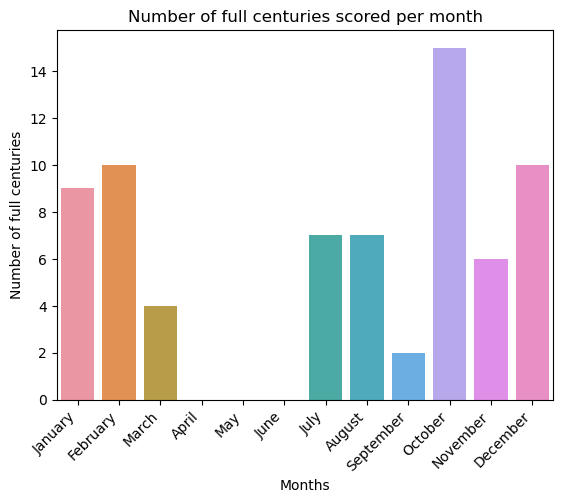

In [42]:
g7 = sns.barplot(x = hundred_runs_by_month.index, y = hundred_runs_by_month['runs'])
g7.set_xlabel('Months')
g7.set_ylabel('Number of full centuries')
g7.set_title('Number of full centuries scored per month')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

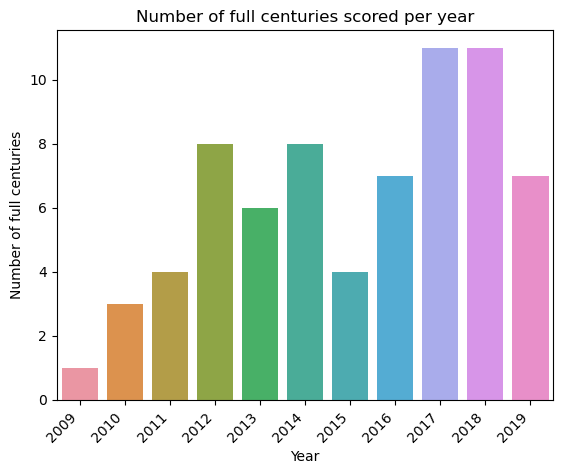

In [43]:
g8 = sns.barplot(x = hundred_runs_by_year.index, y = hundred_runs_by_year['runs'])
g8.set_xlabel('Year')
g8.set_ylabel('Number of full centuries')
g8.set_title('Number of full centuries scored per year')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

In [44]:
### Runs scored in each quarter
runs_by_quarter = df1.drop('date', axis = 1).groupby(['Quarter']).sum()[['runs']]
runs_by_quarter

,runs
Quarter,
2008-Q3,159
2009-Q3,97
2009-Q4,228
2010-Q1,363
2010-Q2,261
2010-Q3,45
2010-Q4,352
2011-Q1,468
2011-Q2,294


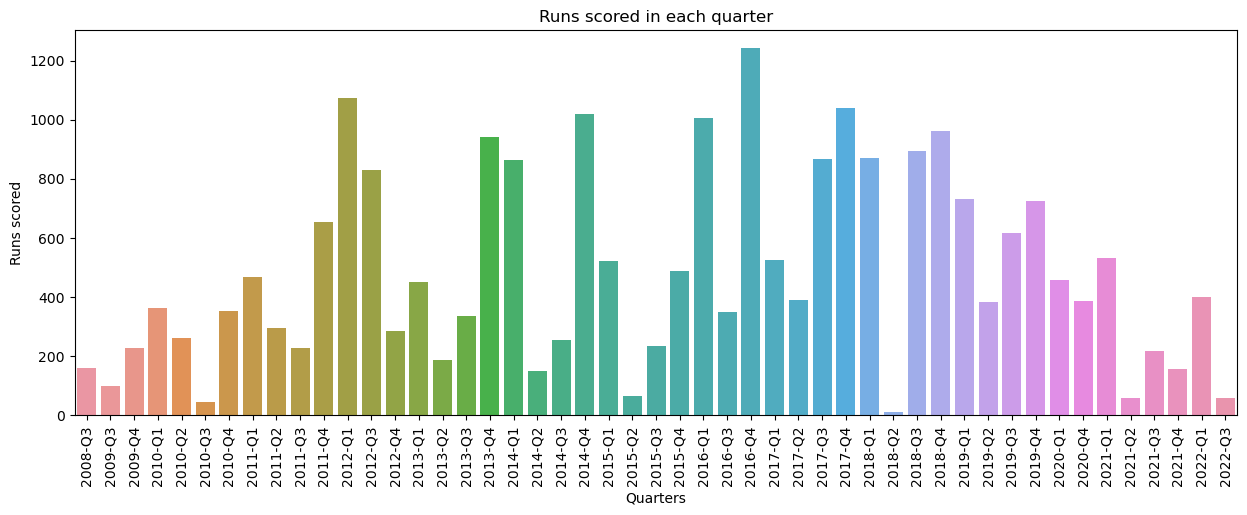

In [45]:
plt.figure(figsize = (15,5))
g9 = sns.barplot(x = runs_by_quarter.index, y = runs_by_quarter['runs'])
g9.set_xlabel('Quarters')
g9.set_ylabel('Runs scored')
g9.set_title('Runs scored in each quarter')
plt.xticks(rotation = 90)
plt.show()

In [46]:
### Top 10 highest runs in which venues
highest_runs_in_venue = df1.sort_values(by = 'runs', ascending = False)[['ground']].head(10)
highest_runs_in_venue

,ground
434,Pune
349,Delhi
297,Wankhede
348,Nagpur
284,Indore
305,Hyderabad(Deccan)
275,NorthSound
103,Mirpur
219,Melbourne
293,Visakhapatnam


In [47]:
### Overall parameters accross all formats
overall = df1.groupby('match')['runs'].agg(['count','sum', 'mean', 'max', lambda x: (x > 50).sum(), lambda x: (x > 100).sum() ,lambda x: (x > 200).sum()])
overall.rename(columns = {'count':'Matches', 'sum':'Runs', 'mean':'Avg runs', 'max':'Highest runs', '<lambda_0>':'50s', '<lambda_1>':'100s', '<lambda_2>':'200s'}, inplace = True)
overall['Avg runs'] = overall['Avg runs'].map('{:.2f}'.format)
overall

,Matches,Runs,Avg runs,Highest runs,50s,100s,200s
match,,,,,,,
ODI,252,12327,48.92,183,107,41,0
T20,91,3308,36.35,94,28,0,0
Test,173,8074,46.67,254,53,27,6


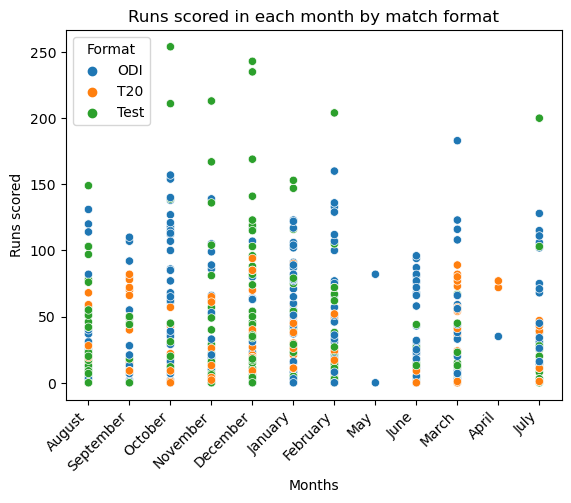

In [48]:
### Runs scored in each month by match format
g10 = sns.scatterplot(x = 'Month', y = 'runs', hue = 'match', data = df1)
g10.set_xlabel('Months')
g10.set_ylabel('Runs scored')
g10.set_title('Runs scored in each month by match format')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.legend(title = 'Format')
plt.show()

In [49]:
### Centuries by grounds
hundred_by_ground = hundred.drop('date', axis = 1).groupby(['ground']).count()[['runs']]
hundred_by_ground

,runs
ground,
Adelaide,5
Bengaluru,1
Birmingham,1
Canberra,1
CapeTown,1
Cardiff,1
Centurion,2
Chennai,2
Colombo(RPS),3


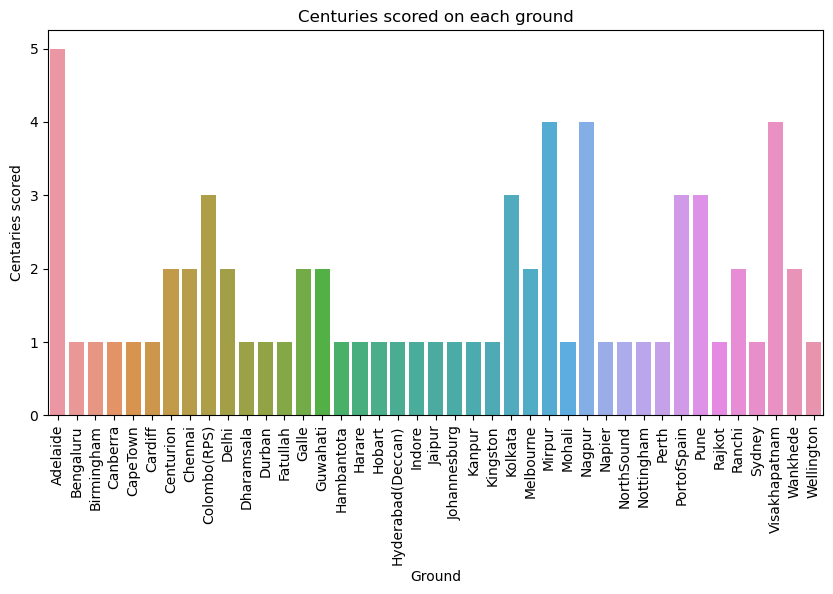

In [50]:
plt.figure(figsize = (10, 5))
g11 = sns.barplot(x = hundred_by_ground.index, y = 'runs', data = hundred_by_ground)
g11.set_xlabel('Ground')
g11.set_ylabel('Centaries scored')
g11.set_title('Centuries scored on each ground')
plt.xticks(rotation = 90)
plt.show()

In [107]:
### Average runs against each team in different formats
runs_by_teams_format = df1.groupby(['opponent', 'match'])['runs'].mean().unstack()
runs_by_teams_format.dropna(inplace = True)
runs_by_teams_format

match,ODI,T20,Test
opponent,,,
Australia,50.804878,39.888889,46.722222
Bangladesh,56.666667,32.250000,78.400000
England,38.911765,31.000000,39.820000
NewZealand,53.000000,31.100000,41.238095
SouthAfrica,50.107143,28.222222,51.500000
SriLanka,48.260870,56.500000,60.277778
WestIndies,55.146341,43.846154,43.263158


<Figure size 2000x1000 with 0 Axes>

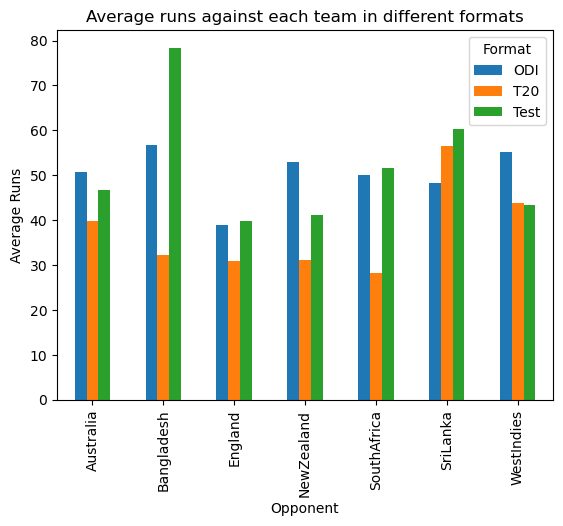

In [113]:
plt.figure(figsize=(20, 10))
runs_by_teams_format.plot(kind = 'bar')
plt.title('Average runs against each team in different formats')
plt.xlabel('Opponent')
plt.ylabel('Average Runs')
plt.legend(title = 'Format')
plt.show()